# Dividir el dataset en conjunto de entrenamiento y de testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [4]:
a = np.random.randn(len(data)) #Crearemos una variables que siga 
#Una distribución normal del tamaño de la cantidad de datos del dataset
print(a)

[ 1.84425783 -0.50830747  0.21487141  0.75409559  0.02120261 -0.29188662
  0.77440684 -0.06700763  0.50150263 -0.57422326 -0.21972978 -0.23848144
 -1.25340533  0.8815105  -1.53833313  1.37767259  1.90606333  2.3624856
  0.93248968  1.42397046 -0.22875244 -0.43286711  0.3661819  -0.38412947
 -0.75351454 -0.50813968  0.53345962 -0.01987088  0.58309761 -0.95884634
  0.30056093 -0.70970437  0.68882165 -0.12009239  0.79489106  1.04386863
 -0.34384561 -1.28227582  0.22863179 -0.05092088  0.28894839  0.50072458
  0.82728959  0.89759827 -0.15881837  0.52587661 -1.16393785 -0.80146619
  0.3588661  -0.70988482  0.27764303  0.14975519  1.69685463 -0.25670623
  0.25802692  1.14304039  1.01388295 -0.19999933 -0.23129358  1.1008027
  0.19720737 -1.19033319 -0.07078576  0.05230776  0.95691479  1.56299989
  0.41173209 -1.70884807  1.66951338  0.14676616  0.15355157  0.61533796
  0.08603039  0.78881838 -0.93335099  0.67293282 -2.40553516  0.95106031
 -0.29162657 -0.81027448 -0.74528277  0.09182615  0.7

(array([ 1.,  2., 10., 17., 30., 50., 40., 32., 14.,  4.]),
 array([-3.12002244, -2.56122892, -2.0024354 , -1.44364187, -0.88484835,
        -0.32605483,  0.23273869,  0.79153221,  1.35032573,  1.90911925,
         2.46791277]),
 <BarContainer object of 10 artists>)

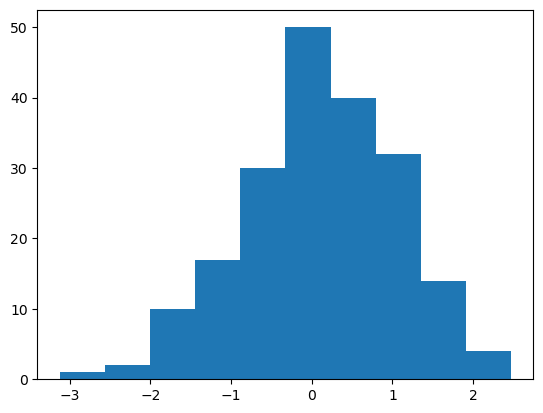

In [5]:
plt.hist(a)

In [6]:
check = (a<0.8) #Creamos una variable boleana con los valores menores de "a" menores a 0.8
training = data[check] #Se escogera el 80% de los valores para entrenamiento
testing = data[~check] # Se escogera el 20% de los valores para testing

In [7]:
len(training), len(testing)

(151, 49)

In [8]:
training.head()

,TV,Radio,Newspaper,Sales
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2


In [9]:
testing.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
13,97.5,7.6,7.2,9.7
15,195.4,47.7,52.9,22.4
16,67.8,36.6,114.0,12.5
17,281.4,39.6,55.8,24.4


In [10]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [11]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     598.7
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           1.15e-71
Time:                        15:34:20   Log-Likelihood:                -290.90
No. Observations:                 151   AIC:                             587.8
Df Residuals:                     148   BIC:                             596.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1818      0.335      9.485      0.000       2.519       3.845
TV             0.0446      0.002     27.186      0.000       0.041       0.048
Radio          0.1843      0.009     20.076      0.000       0.166       0.202
==============================================================================
Omnibus:                       62.091   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.167
Skew:                          -1.575   Prob(JB):                     6.27e-46
Kurtosis:                       7.812   Cond. No.                         415.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
lm.params

Intercept    3.181831
TV           0.044595
Radio        0.184296
dtype: float64

Sales = 3.181831 + 0.044595 * TV + 0.184296 * Radio

## Validacion del modelo con el conjunto de testing

In [13]:
sales_pred = lm.predict(testing) #Predeccion de las ventas de las variables del testing
sales_pred

0      20.409566
13      8.930505
15     20.686650
16     12.950626
17     23.029028
18     10.045887
19     14.155372
35     16.901241
42     21.379961
43     13.956646
52     20.517369
55     21.156037
56      8.686103
59     18.014761
64     16.916133
65      7.972849
68     18.836857
77     13.807987
85     15.188657
87     15.600941
89     16.887739
90     10.074004
91      4.733695
94     10.551493
98     23.896767
100    13.892255
102    17.538770
111    20.963728
119     6.995718
120    14.422261
121     8.019450
124    19.369179
126    10.698802
129     8.051255
132     8.569291
136    11.511024
144    10.199465
148    12.303589
153    18.137537
162    14.919312
166    10.909627
168    17.137009
179    12.409743
183    23.932125
186     9.789869
187    16.993260
188    18.497748
190    12.517918
198    23.569448
dtype: float64

In [14]:
SSD = sum((testing["Sales"] - sales_pred)**2) # Suma de los cuadrados de la diferencia
SSD

142.8995243767626

In [15]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE 

1.7625298293915026

In [16]:
sales_mean = np.mean(testing["Sales"])
sales_mean

14.81224489795918

In [17]:
error = RSE/sales_mean
error*100

11.899140485007392